In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
print(model.summary())
print()

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
print(model.summary())
print()

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
None

____________________________________________________

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (sample x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


SimpleRNN

In [8]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.6056 - acc: 0.6559 - val_loss: 0.5750 - val_acc: 0.6780
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.3753 - acc: 0.8422 - val_loss: 0.4890 - val_acc: 0.7568
Epoch 3/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2890 - acc: 0.8860 - val_loss: 0.7283 - val_acc: 0.7120
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2269 - acc: 0.9150 - val_loss: 0.3683 - val_acc: 0.8624
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1621 - acc: 0.9421 - val_loss: 0.4213 - val_acc: 0.8140
Epoch 6/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1068 - acc: 0.9640 - val_loss: 0.4735 - val_acc: 0.8162
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.

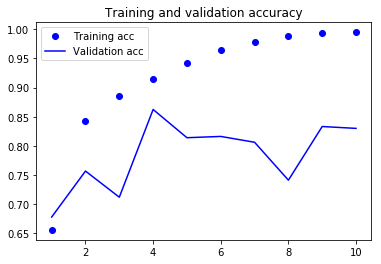

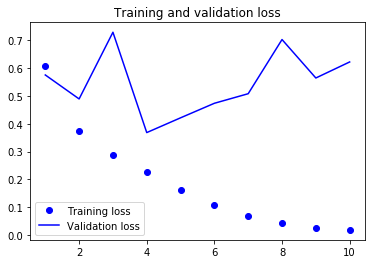

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

LSTM

In [11]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.5048 - acc: 0.7624 - val_loss: 0.3345 - val_acc: 0.8618
Epoch 2/10
20000/20000 [==============================] - 124s 6ms/step - loss: 0.2821 - acc: 0.8904 - val_loss: 0.7287 - val_acc: 0.7786
Epoch 3/10
20000/20000 [==============================] - 125s 6ms/step - loss: 0.2277 - acc: 0.9148 - val_loss: 0.3147 - val_acc: 0.8644
Epoch 4/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.1968 - acc: 0.9281 - val_loss: 0.2808 - val_acc: 0.8892
Epoch 5/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.1753 - acc: 0.9351 - val_loss: 0.4175 - val_acc: 0.8754
Epoch 6/10
20000/20000 [==============================] - 127s 6ms/step - loss: 0.1572 - acc: 0.9452 - val_loss: 0.3604 - val_acc: 0.8786
Epoch 7/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.1403 - acc: 0.9511 - val_loss: 0.3730 - v

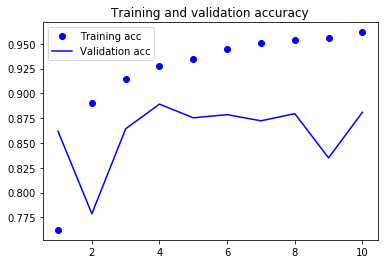

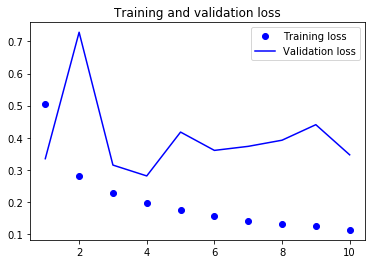

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()